In [2]:
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

import os

In [3]:
def get_unidad_local():
    try:
        # ruta del archivo que contiene la información necesaria
        with open('../../unidad_local.txt', 'r') as file:
            unidad = file.readline().strip()
            return unidad
    except FileNotFoundError:
        print("El archivo 'unidad_local.txt' no se encuentra en la ruta especificada.")
    return None

def get_ruta_local():
    try:
        with open('../ruta_local.txt', 'r') as file:
            ruta = file.readline().strip()
            return ruta
    except FileNotFoundError:
        print("El archivo 'ruta_local.txt' no se encuentra en la ruta especificada.")
    return None

In [4]:
# RUTA ONEDRIVE
unidad = get_unidad_local()
ruta = get_ruta_local()
ruta_completa = os.path.join(unidad, ruta)
ruta_completa

'G:\\OneDrive - Ingenio Azucarero Guabira S.A\\_DATOS_PYTHON'

In [5]:
path_shp_recorridos = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\RECORRIDOS.shp'
path_shp_plan = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\PLANIFICACION.shp'
path_xlsx_parte = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\parte_diario_pulverizacion.xlsx'

In [6]:
# Cargar los archivos Shapefile
gdf_recorridos = gpd.read_file(path_shp_recorridos)
gdf_plan = gpd.read_file(path_shp_plan)

In [94]:
idd = 37

In [95]:
selec_recorridos = gdf_recorridos[gdf_recorridos['idd']==idd]

In [96]:
selec_plan = gdf_plan[gdf_plan['idd'] == idd]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2024\2512288014.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


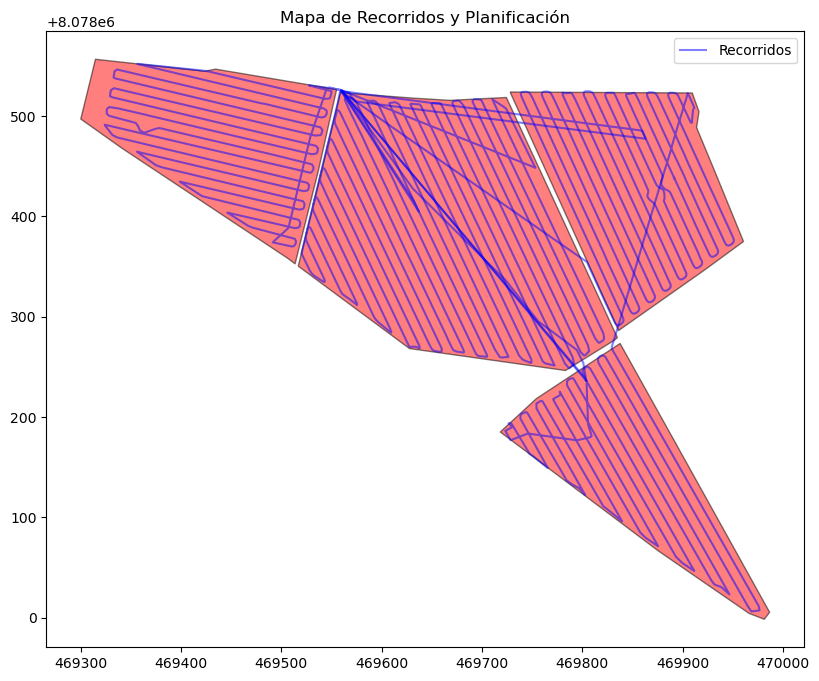

In [97]:
fig, ax = plt.subplots(figsize=(10, 8))
# Graficar las capas
selec_recorridos.plot(ax=ax, color="blue", alpha=0.5, edgecolor="black", label="Recorridos")
selec_plan.plot(ax=ax, color="red", alpha=0.5, edgecolor="black", label="Planificación")

# Configurar la visualización
ax.set_title("Mapa de Recorridos y Planificación")
ax.legend()

# Mostrar el gráfico
plt.show()

In [98]:
selec_recorridos["fecha"] = pd.to_datetime(selec_recorridos["fecha"])

C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [99]:
# Obtener la fecha mínima y máxima
fecha_min = selec_recorridos["fecha"].min()
fecha_max = selec_recorridos["fecha"].max()
fecha_intermedia = fecha_min + (fecha_max - fecha_min) / 2

In [100]:
# Convertir las fechas al formato dd/mm/aaaa
fecha_min_str = fecha_min.strftime("%d/%m/%Y")
fecha_max_str = fecha_max.strftime("%d/%m/%Y")
fecha_intermedia_str = fecha_intermedia.strftime("%d/%m/%Y")
# Obtener el número de semana de la fecha intermedia
numero_semana = fecha_intermedia.isocalendar().week

In [101]:
area_total_pulv = selec_recorridos['area'].sum()
area_total_pulv

13.912666736230001

In [102]:
num_vuelos = len(selec_recorridos)
num_vuelos

8

In [103]:
selec_recorridos.head(3)

,file,fecha,hora,id,drone,ctrl_id,pilot,fl_time,mode,height,spacing,fl_speed,area,spray,idd,geometry
652,T50-1_20250407112416_R0729900411.kml,2025-04-07,11:24:16,R0729900411,T50-1,1581F6BUB24630011R08,Eduardo Reyes,10:26,Auto,4.0,9.5,29.880001,2.588667,26.071,37,"LINESTRING (469557.882 8078525.945, 469547.881..."
653,T50-1_20250407114034_R0789968052.kml,2025-04-07,11:40:34,R0789968052,T50-1,1581F6BUB24630011R08,Eduardo Reyes,10:47,Auto,4.0,9.5,29.880001,3.396667,34.129,37,"LINESTRING (469557.893 8078526.475, 469753.247..."
654,T50-1_20250407115404_R0830013146.kml,2025-04-07,11:54:04,R0830013146,T50-1,1581F6BUB24630011R08,Eduardo Reyes,8:37,Auto,4.0,9.5,29.880001,2.378667,23.878,37,"LINESTRING (469559.457 8078525.794, 469559.457..."


In [104]:
# Convert "fl_time" to total seconds
selec_recorridos["fl_time_sec"] = selec_recorridos["fl_time"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
# Sum all seconds
total_seconds = selec_recorridos["fl_time_sec"].sum()
# Convert back to hh:mm:ss format
hours = total_seconds // 3600
minutes = (total_seconds % 3600) // 60
seconds = total_seconds % 60
total_flight_time = f"{hours:02}:{minutes:02}:{seconds:02}"
total_flight_time

C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


'00:55:53'

In [105]:
total_caudal = selec_recorridos['spray'].sum()
total_caudal

139.883

In [106]:
df_parte = pd.read_excel(path_xlsx_parte)

In [107]:
df_parte['FECHA'] = pd.to_datetime(df_parte['FECHA'], errors='coerce')
df_parte['HORA DE INICIO'] = pd.to_datetime(df_parte['HORA DE INICIO'], errors='coerce')
df_parte['HORA FINAL'] = pd.to_datetime(df_parte['HORA FINAL'], errors='coerce')

In [108]:
df_parte.head(3)

,Nº DE LABOR,FECHA,SEMANA,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,...,OS,TEMP MAX,TEMP MIN,TIPO CULTIVO,TIPO DESARROLLO,NUM VUELOS,HORAS VUELO,TOTAL CAUDAL,idd,AREA PULVERIZADO
0,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L31,30.260942,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,28.333271
1,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L16,23.216246,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,21.634272
2,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L6,19.683505,...,1,25,20,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1,19.160233


In [109]:
# extraer primer dato de temp max
temp_max = df_parte[df_parte['idd'] == idd]['TEMP MAX'].iloc[0]
temp_min = df_parte[df_parte['idd'] == idd]['TEMP MIN'].iloc[0]

In [110]:
temp = round((temp_max + temp_min) / 2)
temp

23

In [111]:
# Aplicar el buffer a la geometría
selec_recorridos["geometry"] = selec_recorridos.geometry.buffer(5.5)

C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [112]:
# Disolver todas las geometrías en un solo polígono
buffer_dissolved = selec_recorridos.dissolve()

In [113]:
buffer_dissolved

,geometry,file,fecha,hora,id,drone,ctrl_id,pilot,fl_time,mode,height,spacing,fl_speed,area,spray,idd,fl_time_sec
0,"POLYGON ((469835.830 8078267.717, 469837.814 8...",T50-1_20250407112416_R0729900411.kml,2025-04-07,11:24:16,R0729900411,T50-1,1581F6BUB24630011R08,Eduardo Reyes,10:26,Auto,4.0,9.5,29.880001,2.588667,26.071,37,626


In [114]:
# Calcular la intersección
interseccion = gpd.overlay(buffer_dissolved, selec_plan, how="intersection")

In [115]:
# Calcular el área de cada polígono de la intersección
interseccion["area_rociado"] = interseccion.geometry.area / 10000

In [116]:
resumen = interseccion[['id_2', 'unidad_05', 'area_2', 'area_rociado']].copy()

In [117]:
suma_area_rociada = resumen['area_rociado'].sum()
area_rociada_real = area_total_pulv  # aquí pon tu valor real
# Factor inicial de ajuste
factor_ajuste = area_rociada_real / suma_area_rociada
# Ajuste proporcional inicial
resumen['area_ajustada'] = resumen['area_rociado'] * factor_ajuste
# Verificar que no exceda area_2 y corregir iterativamente si es necesario
while any(resumen['area_ajustada'] > resumen['area_2']):
    exceso = resumen['area_ajustada'] > resumen['area_2']
    resumen.loc[exceso, 'area_ajustada'] = resumen.loc[exceso, 'area_2']
    # Recalcular factor solo con las filas no ajustadas al máximo permitido
    area_ajustada_parcial = resumen.loc[~exceso, 'area_ajustada'].sum()
    area_restante = area_rociada_real - resumen.loc[exceso, 'area_ajustada'].sum()
    # Evitar división por cero
    if area_ajustada_parcial == 0:
        break
    nuevo_factor = area_restante / area_ajustada_parcial
    resumen.loc[~exceso, 'area_ajustada'] *= nuevo_factor

In [118]:
resumen["porcen_rociado"] = (resumen["area_ajustada"]) / (resumen["area_2"])

In [119]:
resumen["dif_area"] = resumen["area_2"] - resumen["area_ajustada"]

In [120]:
for i, row in resumen.iterrows():
    df_parte.loc[(df_parte['ID'] == row['id_2']), 'AREA PULVERIZADO'] = row['area_ajustada']

In [121]:
df_parte.loc[(df_parte['idd'] == idd), 'FECHA'] = fecha_intermedia
df_parte.loc[(df_parte['idd'] == idd), 'SEMANA'] = numero_semana
df_parte.loc[(df_parte['idd'] == idd), 'HORA DE INICIO'] = fecha_min
df_parte.loc[(df_parte['idd'] == idd), 'HORA FINAL'] = fecha_max
df_parte.loc[(df_parte['idd'] == idd), 'TEMPERATURA'] = temp
df_parte.loc[(df_parte['idd'] == idd), 'NUM VUELOS'] = num_vuelos
df_parte.loc[(df_parte['idd'] == idd), 'HORAS VUELO'] = total_flight_time
df_parte.loc[(df_parte['idd'] == idd), 'TOTAL CAUDAL'] = total_caudal

In [122]:
output_path = path_xlsx_parte
df_parte.to_excel(output_path, index=False)